<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fjeahyuk/jeahyuk/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
회귀분석이란 것에 잘 이해하지 못하고 있다는 생각이 들었다.  

이전에 분류 모델을 회귀로 풀이하려고 했더니 라쏘 모델에서 모든특성이 의미 없다는 결과가 나오고 나서야 지금 내가 하고 있는 것이 분류라는 것을 깨닫았다. 

회귀란  
관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법이다.  
[회귀 분석 위키](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D)

하지만 이전에 카테고리컬(범주형) 변수를 회귀로 풀어버려서 엉뚱한 결과가 나타났다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [ ]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.97MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [ ]:
!ls

Fish.csv  fish-market.zip  sample_data


In [ ]:
df = pd.read_csv('Fish.csv')

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
y=df['Weight']
X=df.drop(['Species','Weight','Length2','Length3'] ,axis=1)

In [ ]:
X

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340
...,...,...,...
154,11.5,2.0904,1.3936
155,11.7,2.4300,1.2690
156,12.1,2.2770,1.2558
157,13.2,2.8728,2.0672


# 데이터 선형성 파악

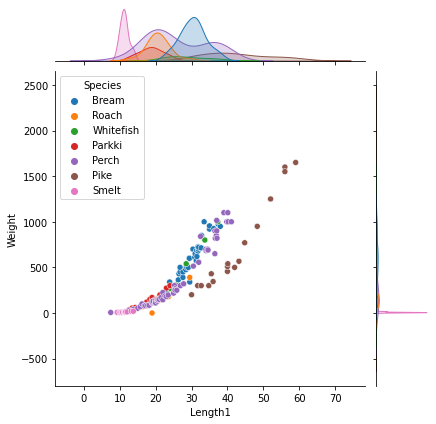

In [ ]:
sns.jointplot(x='Length1', y='Weight',hue='Species', data=df )

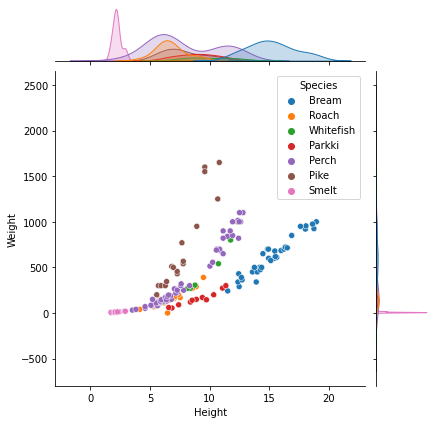

In [ ]:
sns.jointplot(x='Height', y='Weight',hue='Species', data=df )

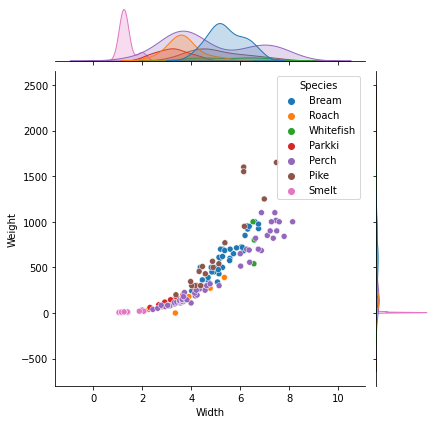

In [ ]:
sns.jointplot(x='Width', y='Weight', hue='Species',data=df )

## Species 의 문제
이 데이터의 다중 회귀를 사용해서 선형성을 찾는다고 해도 무게를 예측하는 데 도움이 될 것 같지 않다.
왜냐하면 각 종의 선형성이 다를 것이기 때문에 종류를 1가지로 제한하는 것이 좋을 것 혹은 종에 대하여 각각 선형성을 구하는 것이 나을 것이라고 생각한다.

# 데이터 종을 농어로 제한하여 다시 만들기



In [ ]:
df.Perch = df[(df['Species']=='Perch')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
y=df.Perch['Weight']
X=df.Perch.drop(['Species','Weight','Length2','Length3'] ,axis=1)

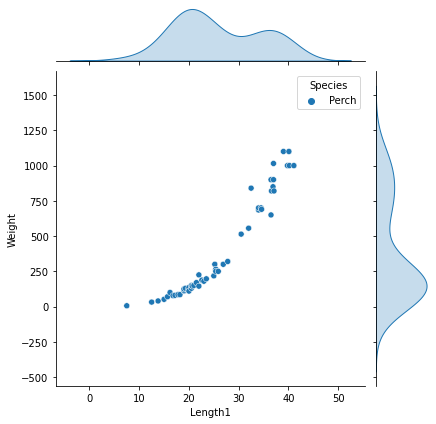

In [ ]:
sns.jointplot(x='Length1', y='Weight',hue='Species', data=df.Perch )

In [ ]:
df.Perch

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [ ]:
X

,Length1,Height,Width
72,7.5,2.1120,1.4080
73,12.5,3.5280,1.9992
74,13.8,3.8240,2.4320
75,15.0,4.5924,2.6316
76,15.7,4.5880,2.9415
77,16.2,5.2224,3.3216
78,16.8,5.1992,3.1234
79,17.2,5.6358,3.0502
80,17.8,5.1376,3.0368
81,18.2,5.0820,2.7720


# 훈련 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input,  test_input, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state=42)

# 다중 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
poly_features.fit(train_input)

train_poly = poly_features.transform(train_input)
test_poly = poly_features.transform(test_input)

In [ ]:
print(train_poly.shape)

(39, 55)


## 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

y_predict=lr.predict(train_poly)

0.9999999999999989


In [ ]:
print(lr.score(test_poly, test_target))

-25.478012034001146


In [ ]:
poly_features.get_feature_names_out()

array(['Length1', 'Height', 'Width', 'Length1^2', 'Length1 Height',
       'Length1 Width', 'Height^2', 'Height Width', 'Width^2',
       'Length1^3', 'Length1^2 Height', 'Length1^2 Width',
       'Length1 Height^2', 'Length1 Height Width', 'Length1 Width^2',
       'Height^3', 'Height^2 Width', 'Height Width^2', 'Width^3',
       'Length1^4', 'Length1^3 Height', 'Length1^3 Width',
       'Length1^2 Height^2', 'Length1^2 Height Width',
       'Length1^2 Width^2', 'Length1 Height^3', 'Length1 Height^2 Width',
       'Length1 Height Width^2', 'Length1 Width^3', 'Height^4',
       'Height^3 Width', 'Height^2 Width^2', 'Height Width^3', 'Width^4',
       'Length1^5', 'Length1^4 Height', 'Length1^4 Width',
       'Length1^3 Height^2', 'Length1^3 Height Width',
       'Length1^3 Width^2', 'Length1^2 Height^3',
       'Length1^2 Height^2 Width', 'Length1^2 Height Width^2',
       'Length1^2 Width^3', 'Length1 Height^4', 'Length1 Height^3 Width',
       'Length1 Height^2 Width^2', 'Length1 Hei

# 규제

## 릿지

In [ ]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# ss.fit(train_poly)

# train_scaled = ss.transform(train_poly)
# test_scaled = ss.transform(test_poly)

In [ ]:
train_scaled = train_poly
test_scaled = test_poly

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.996942413469816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9387975380677549


In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.24

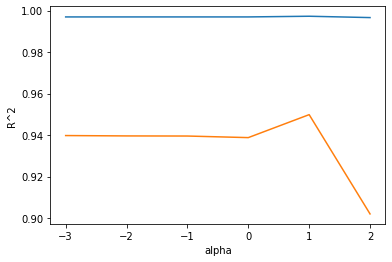

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9969407460831858
0.939557297887645


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


# 라쏘

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9895984337112341


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.546e+04, tolerance: 4.887e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9698796009744133


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+04, tolerance: 4.887e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+04, tolerance: 4.887e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

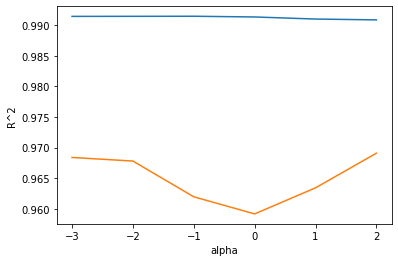

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
print(np.sum(lasso.coef_ == 0))

23
